# SFM processes (modified from pyBadlands)

In [ ]:
import numpy as np
from badlands.model import Model as badlandsModel

for ip in range(2):
    dir =  './Inputs/Models/xmldirs/basin_demo'+str(ip)+'.xml'
    print(dir)
    print("\n")
    model = badlandsModel()
    model.load_xml(dir)
    model.run_to_time(20000000)
    print("********" + dir +' is done ********')
    print("\n")

# Visualization-1 (referred to Ding et al,2019)

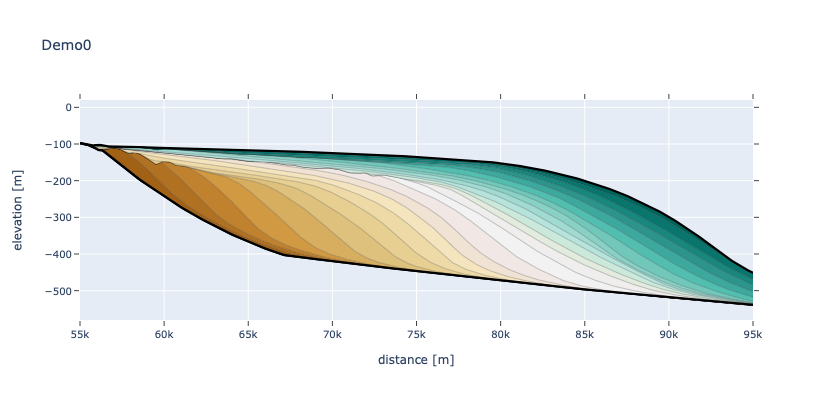

In [2]:
import os
import re
import rdp
import numpy as np
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import stratalAnalyse as strata
# display plots in SVG format
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

model_num = 0
num = 50
path = './Inputs/Models/results/demo'+str(model_num)+'_output/'
folder = path + 'h5/'
strat = strata.stratalSection(folder)
strat.loadStratigraphy(num)
x1 = strat.xi.min()
x2 = strat.xi.max()
y1 = 20000
y2 = 20000
nbpts = strat.nx
gfilt = 1
strat.buildSection(xo = x1, yo = y1, xm = x2, ym = y2, pts = nbpts, gfilter = gfilt)
strata.viewSection(width = 800, height = 400, cs = strat, title="Demo0",
            dnlay = 4, rangeX=[55000,95000], rangeY=[-580,20], linesize = 0.2)

# Visualization-2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Topography 3D visualization

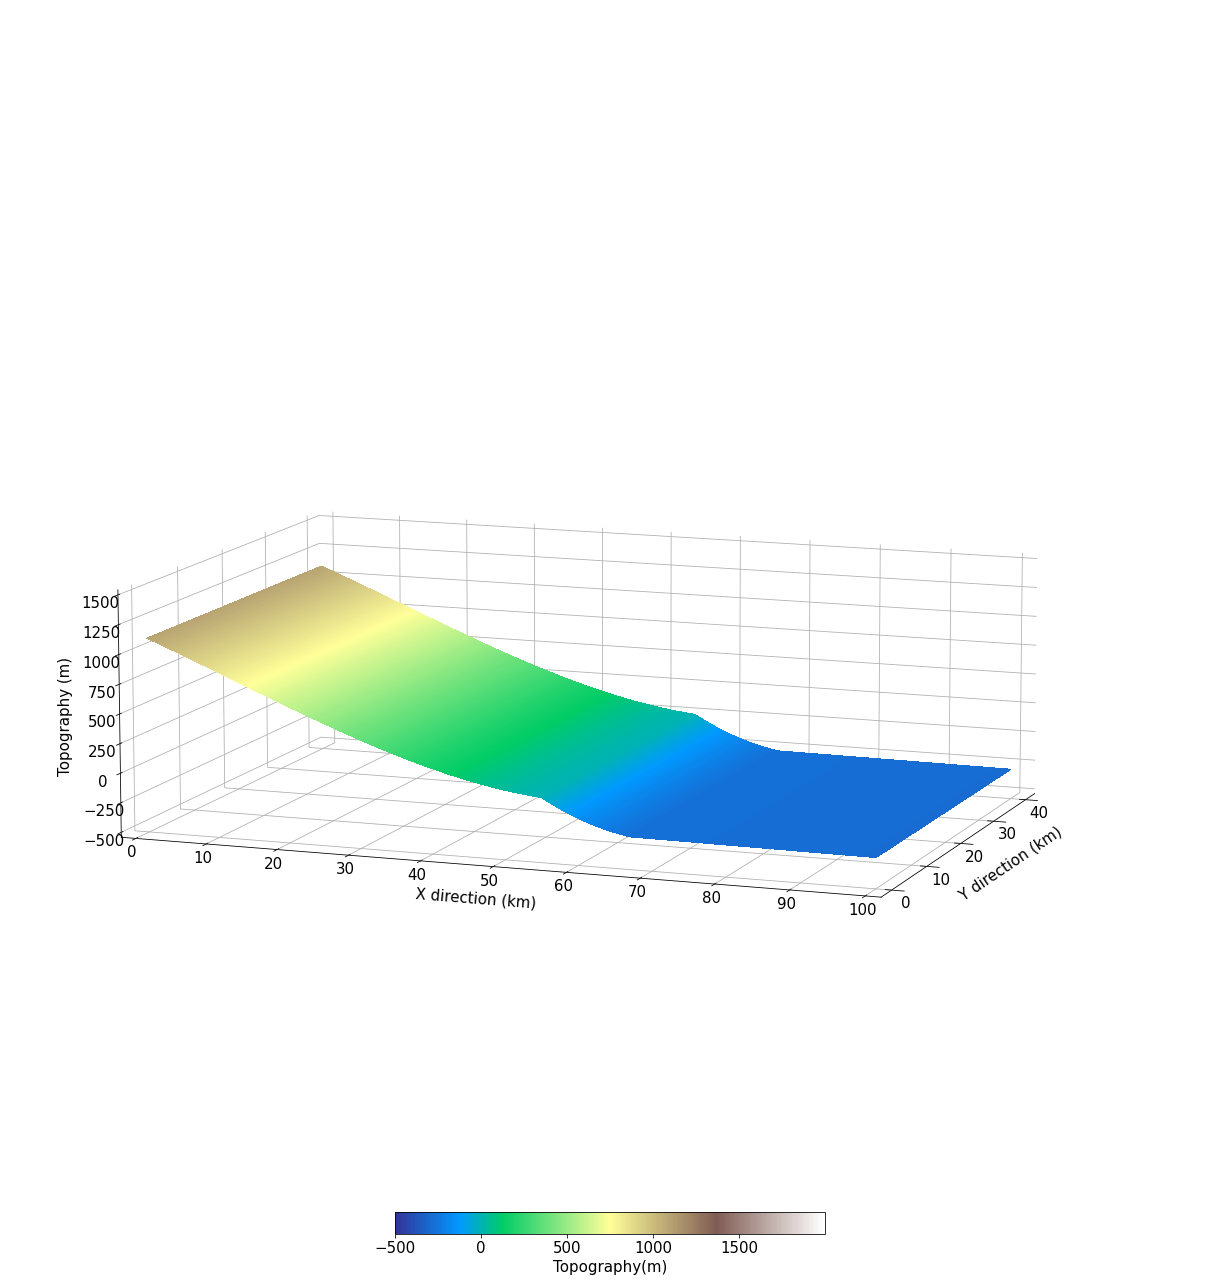

In [2]:
x=np.linspace(0,1000,1001)*0.1
y=np.linspace(0,400,401)*0.1

ZZ = np.loadtxt("./Inputs/Models/inputs/demo0/node.csv",dtype=np.float32).reshape((len(x)*len(y),3))
Z = ZZ[:,2]
fig = plt.figure(figsize=(60,20))
ax = fig.gca(projection='3d')
xx,yy=np.meshgrid(x,y)
zz=np.reshape(Z,(len(yy),len(xx[1])))
surf = ax.plot_surface(yy, xx, zz, rstride=1,cstride=1,vmin=-500,vmax=2000,cmap="terrain",lw=1,antialiased=False)
ax.set_ylim(0, 100)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticks([0,10,20,30,40])
ax.set_zticks([-500,0,500,1000,1500],minor=True)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.65, 1, 0.42, 1]))
ax.view_init(10,20)
ax.tick_params(width=10,labelsize=15,grid_linewidth=0.1)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.invert_xaxis()
ax.set_xlabel("Y direction (km)",fontsize=15,labelpad=20)
ax.set_ylabel("X direction (km)",fontsize=15,labelpad=35)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"Topography (m)",fontsize=15,labelpad=15,rotation=90)
# ax.invert_zlabel()
cb = plt.colorbar(surf, shrink=0.1,pad=0.0001,orientation='horizontal')
cb.ax.tick_params(labelsize=15)
cb.set_label('Topography(m)',fontsize=15)
cb.set_ticks([-500,0,500,1000,1500]) 
fig.tight_layout()
plt.show(surf)
# plt.savefig("./imgs/Topography.png",bbox_inches='tight',dpi=300)

### 2. Sea level curve visualization

0


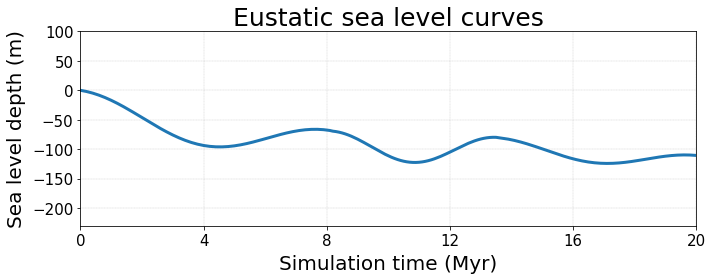

In [12]:
plt.figure(figsize=(10,4))
num=201
x = np.linspace(0,20,201)
for i in range(1):
    if(i%200==0):
        print(i)
    filepath = "./Inputs/Models/inputs/demo"+str(i)+"/sealevel.csv"
    z = np.loadtxt(filepath,dtype=np.float32).reshape(num,2)
    Z = z[:,1]
    plt.plot(x, Z, linewidth=3)   
plt.xticks([0,4,8,12,16,20],fontsize=15)
plt.yticks([-250,-200,-150,-100,-50,0,50,100],fontsize=15)
plt.xlabel("Simulation time (Myr)",fontsize=20,labelpad=6)
plt.ylabel("Sea level depth (m)",fontsize=20,labelpad=6)
plt.xlim(0,20)
plt.ylim(-230,100)
plt.title("Eustatic sea level curves",fontsize=25)
plt.grid(ls='--',lw=0.3)
plt.tight_layout()
# plt.savefig("imgs/sealevel.png",bbox_inches='tight',dpi=300)

### 3. Thermal subsidence curve visualization

0


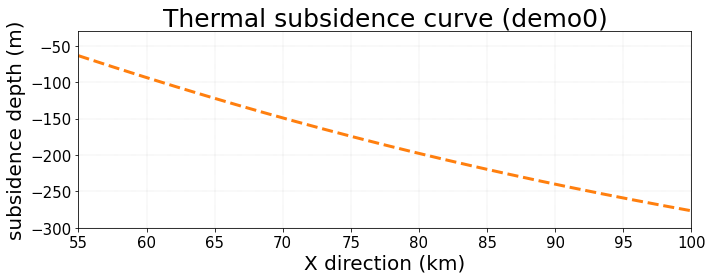

In [11]:
plt.figure(figsize=(10,4))
for i in range(1):
    if(i%20==0):
        print(i)
    ZZ = np.loadtxt("./Inputs/Models/inputs/demo"+str(i)+"/thermsub.csv",dtype=np.float32)
    Z = ZZ[550:1001]
    x = np.linspace(0,45,451)
    plt.plot(x, Z, linewidth=3,ls="--",color='#ff7f0e')
plt.tick_params(labelsize=8)  
plt.xticks([0,5,10,15,20,25,30,35,40,45],[55,60,65,70,75,80,85,90,95,100],fontsize=15)
plt.yticks([-300,-250,-200,-150,-100,-50],fontsize=15)
plt.xlabel("X direction (km)",fontsize=20)
plt.ylabel("subsidence depth (m)",fontsize=20)
plt.xlim(0,45)
plt.ylim(-300,-30)
plt.title("Thermal subsidence curve (demo"+str(i)+")",fontsize=25)
plt.grid(ls='--',lw=0.2)
plt.tight_layout()
# plt.savefig("Thermal.png",bbox_inches='tight',dpi=300)

## SFM results visualization

In [17]:
import os
import re
import rdp
import h5py
import numpy as np
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt

def smooth(v, w=0.85):
    last = v[0]
    smoothed = []
    for point in v:
        smoothed_val = last * w + (1 - w) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed 

In [19]:
path = './Inputs/Models/results/demo0_output/'
folder = path + 'h5/'
sed = h5py.File(folder + 'sed.time50.hdf5', 'r')
coords = np.array(sed['/coords'])
layDepth = np.array(sed['/layDepth'])
layPoro = np.array(sed['/layPoro'])
layElev = np.array(sed['/layElev'])
x, y = np.hsplit(coords, 2)
dx = x[1] - x[0]
nx = int((x.max() - x.min()) / dx + 1)
ny = int((y.max() - y.min()) / dx + 1)
nz = layDepth.shape[1]
depth = layDepth.reshape((ny, nx, nz))  # depth data
poro = layPoro.reshape((ny, nx, nz))  # poro data
elev = layElev.reshape((ny, nx, nz))  # elev data

### 4. RGT visualization

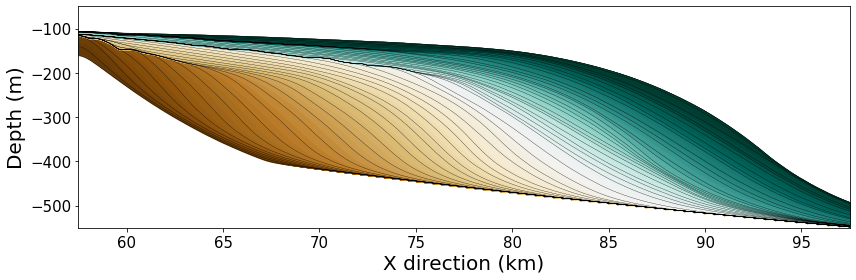

In [20]:
def num2color_rgt(values, cmap):
    norm = mpl.colors.Normalize(vmin=0, vmax=100)
    cmap = mpl.cm.get_cmap(cmap)
    return [cmap(norm(val)) for val in values]
xr1=575
xr2=975
dep = depth[200,xr1:xr2,:]
rgt = np.linspace(0,201,200)
# print(np.nanmin(elev1),np.nanmax(elev1))
colors = num2color_rgt(rgt,"BrBG")
colors = np.array(colors)
colors[:,3] = colors[:,3]*0.9
x = np.linspace(xr1,xr2,400)/10
plt.figure(figsize=(12,4))
interval=2
smoothing = 0.8
for i in range(0,101):
    if(i%interval==0):
        plt.plot(x,smooth(dep[:,i],smoothing),"k",lw=0.3)
    if(i!=0):
        plt.fill_between(x,smooth(dep[:,i-interval],smoothing),smooth(dep[:,i],smoothing),color=colors[i])
plt.xlim(57.5,97.5)
plt.ylim(-550,-50)
plt.xticks([60,65,70,75,80,85.0,90,95],fontsize=15)
plt.xlabel("X direction (km)",fontsize=20)
plt.yticks([-100,-200,-300,-400,-500],fontsize=15)
plt.ylabel("Depth (m)",fontsize=20)
plt.tight_layout()
# plt.savefig("fig2-3-1.png",bbox_inches='tight',dpi=300)

### 5. Paleo-depth visualization

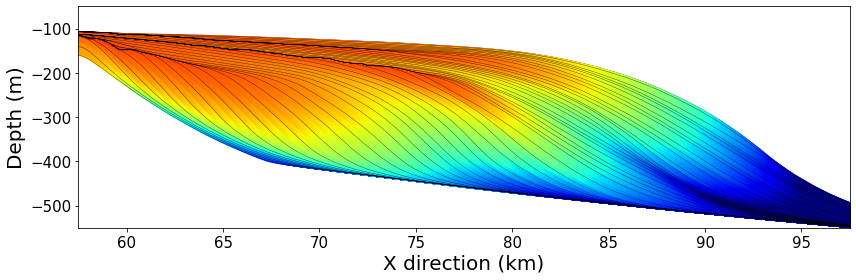

In [22]:
def num2color_paleo_depth(values, cmap):
    norm = mpl.colors.Normalize(vmin=-320, vmax=70)
    cmap = mpl.cm.get_cmap(cmap)
    return [cmap(norm(val)) for val in values]

xr1=575
xr2=975
dep = depth[200,xr1:xr2,:]
elev1 = elev[200,xr1:xr2,:]
for i in range(101):
    elev1[:,i] = smooth(elev1[:,i],0.8)
colors = num2color_paleo_depth(elev1,"jet")
colors = np.array(colors)
x = np.linspace(xr1,xr2,400)/10
plt.figure(figsize=(12,4))
interval=2
smoothing = 0.8
for i in range(0,100,1):
    if(i%interval==0):
        plt.plot(x,smooth(dep[:,i],smoothing),"k",lw=0.3)
    if(i!=0):
        for j in range(len(smooth(dep[:,i],smoothing))-1):
            plt.fill_between([x[j],x[j+1]],
                             [smooth(dep[:,i-interval],smoothing)[j],smooth(dep[:,i-interval],smoothing)[j+1]],
                             [smooth(dep[:,i],smoothing)[j],smooth(dep[:,i],smoothing)[j+1]],
                             color=colors[j+1,i,:])
plt.xlim(57.5,97.5)
plt.ylim(-550,-50)
plt.xticks([60,65,70,75,80,85.0,90,95],fontsize=15)
plt.xlabel("X direction (km)",fontsize=20)
plt.yticks([-100,-200,-300,-400,-500],fontsize=15)
plt.ylabel("Depth (m)",fontsize=20)
plt.tight_layout()
# plt.savefig("fig2-3-2.png",bbox_inches='tight',dpi=300)

### 6. Porosity visualization

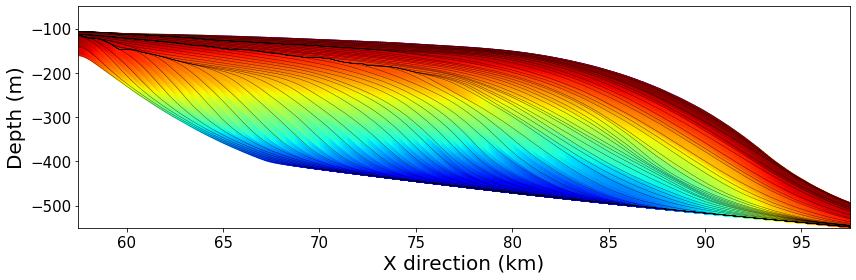

In [23]:
def num2color_poro(values, cmap):
    norm = mpl.colors.Normalize(vmin=0.29, vmax=0.34)
    cmap = mpl.cm.get_cmap(cmap)
    return [cmap(norm(val)) for val in values]

xr1=575
xr2=975
dep = depth[200,xr1:xr2,:]
poro1 = poro[200,xr1:xr2,:]
for i in range(101):
    poro1[:,i] = smooth(poro1[:,i],0.7)
colors = num2color_poro(poro1,"jet")
colors = np.array(colors)
x = np.linspace(xr1,xr2,400)/10
plt.figure(figsize=(12,4))
interval=2
smoothing = 0.8
for i in range(0,100,1):
    if(i%interval==0):
        plt.plot(x,smooth(dep[:,i],smoothing),"k",lw=0.3)
    if(i!=0):
        for j in range(len(smooth(dep[:,i],smoothing))-1):
            plt.fill_between([x[j],x[j+1]],
                             [smooth(dep[:,i-interval],smoothing)[j],smooth(dep[:,i-interval],smoothing)[j+1]],
                             [smooth(dep[:,i],smoothing)[j],smooth(dep[:,i],smoothing)[j+1]],
                             color=colors[j+1,i,:])
plt.xlim(57.5,97.5)
plt.ylim(-550,-50)
plt.xticks([60,65,70,75,80,85.0,90,95.0],fontsize=15)
plt.xlabel("X direction (km)",fontsize=20)
plt.yticks([-100,-200,-300,-400,-500],fontsize=15)
plt.ylabel("Depth (m)",fontsize=20)
plt.tight_layout()
# plt.savefig("fig2-3-3.png",bbox_inches='tight',dpi=300)